<a href="https://colab.research.google.com/github/lwy2107/GK_co_work/blob/master/%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [7]:
print(train_input.shape, test_target.shape)
print(len(train_input[0]))
print(len(train_input[1]))

(25000,) (25000,)
218
189


훈련데이터의 샘플수, 훈련데이터 샘플수
첫번째 리뷰의 토큰수
두번째 리뷰의 토큰수

토큰의 내용을 풀어본다.

In [8]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


위의 단어에 매핑된 숫자는 단순히 해당 문자의 출현빈도에 따라 정해진것이다.
그렇다면 타깃의 데이터를 출력해보자.

In [9]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


현재 타깃값이 긍정인지 부정인지 확인하는문제가 제일 중요하다.

In [10]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [11]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


평균 단어수 239개이고 중간값이 178개이다. 리뷰길이 데이터는 한쪽에 치우쳐져있는것으로 보인다.

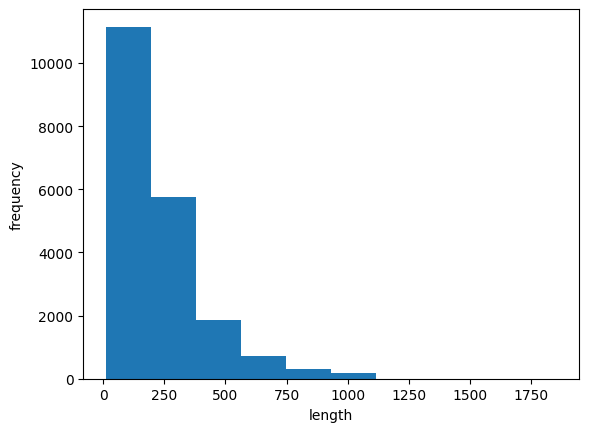

In [12]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)
print(train_seq[0])
print(train_input[0][-10:])

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


시퀀스를 이용하여 리뷰의 길이를 100개로 한정했다. 100개 이하의 단어를 사용한 샘플의 경우에는 패딩을 사용하여 100개를 채워주게 된다.
100개로 한정후에 첫번째 리뷰의 샘플을 가져와 출력했다. 해당글이 200자 이상이였던것을 생각하면 상당히 많이 줄어든것을 볼수 있다.
그 밑에는 제대로 줄여졌는지 확인하기 위해서 첫번째 리뷰의 맨 마지막 10개의 단어를 가져왔는것이다.
이렇게 되는 이유는 pad_sequences는 뒷부분을 자르는것이아니라 앞부분을 슬라이싱 하여 제거하게 된다. 이유는 중요한 내용이 뒤에있기를 기대하기 때문이다.
만약 앞의 내용이 중요할것으로 생각하면 truncating함수의 매개변수를 pad가 아니라 post로 한다.

In [14]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


이 샘플을 보면 앞부분에 0이 들어가있는것이 보이는데 이것은 패딩이 되어 0으로 처리된것이다. 즉 단어가 100개가 안되는 리뷰였다는것이 된다.

In [15]:
val_seq=pad_sequences(val_input, maxlen=100)

이렇게 맵핑된 값들을 확인해보았고 맵핑방법도 잘 보았다. 그럼이제 훈련세트와 검증세트를 만든후 신경망을 테스트 해보자

In [16]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))# 입력차원
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
train_oh=keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


이제 정수하나마다 500차원의 배열로 변경이 되었다.
그렇기에 원래 20000,100이 20000,100,500 으로 변경된것이다.


In [18]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


첫번째 샘플의 첫번째 토큰을 출력해보았다. 처음 12개의 원소를 출력하면 열한번째 원소가 1인것을 확인할수 있다.

In [19]:
print(np.sum(train_oh[0][0]))

1.0


In [20]:
val_oh=keras.utils.to_categorical(val_seq)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


순환층은 마지막 타임스텝의 윽닉상태만 출력한다 그러므로 나오는 값은 입력값과 동일한 8로 출력이 나오게된다.
파라미터를 확인해보자
4072=8(뉴런)*500(입력토큰)+8(은닉상태의 크기)*8(뉴런) 이렇게 나오게된다.

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model.fit(train_oh, train_target, epochs=100, batch_size=64,validation_data=(val_oh,val_target),callbacks=[checkpoint_cb, early_stopping_cb])